In [1]:
#importing the fed data
import numpy as np
import pandas as pd
df1=pd.read_csv('btcusd.csv')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3158,2023-05-11,27621.085938,27621.941406,26781.826172,27000.789063,27000.789063,16724343943
3159,2023-05-12,26987.662109,27055.646484,25878.429688,26804.990234,26804.990234,19313599897
3160,2023-05-13,26807.769531,27030.482422,26710.873047,26784.078125,26784.078125,9999171605
3161,2023-05-14,26788.974609,27150.976563,26661.355469,26930.638672,26930.638672,10014858959


In [2]:
df1 = df1[['Date', 'Close']]
df1

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3158,2023-05-11,27000.789063
3159,2023-05-12,26804.990234
3160,2023-05-13,26784.078125
3161,2023-05-14,26930.638672


In [3]:
df2=pd.read_csv('fed_rate.csv')
df2

,Date,Currently
0,2014-09-17,0.09
1,2014-09-18,0.09
2,2014-09-19,0.09
3,2014-09-20,0.09
4,2014-09-21,0.09
...,...,...
3158,2023-05-11,5.08
3159,2023-05-12,5.08
3160,2023-05-13,5.08
3161,2023-05-14,5.08


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3163 non-null   object 
 1   Close   3163 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3163 non-null   object 
 1   Currently  3163 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [6]:
# Sadece "Close" ve "Currently" sütunlarını seç
df1_selected = df1[['Close']]
df2_selected = df2[['Currently']]

# Veri setlerini birleştir
merged_df = pd.concat([df1_selected, df2_selected], axis=1)

# Korelasyonu hesapla
correlation = merged_df.corr()

# Sonucu görüntüle
print(correlation)

              Close  Currently
Close      1.000000  -0.042587
Currently -0.042587   1.000000


In [7]:
# Sadece "Date" ve "Close" sütunlarını seç
df1_selected = df1[['Date', 'Close']]
df2_selected = df2[['Date', 'Currently']]

# Veri setlerini birleştir
merged_df2 = pd.merge(df1_selected, df2_selected, on='Date')

merged_df2
# merged_df'yi CSV olarak kaydet
merged_df2.to_csv('merged2_data.csv', index=False)

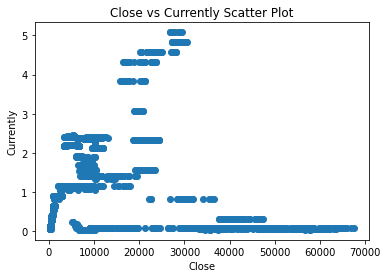

In [8]:
# Scatter plot (nokta grafiği) oluştur

import pandas as pd
import matplotlib.pyplot as plt
plt.scatter(merged_df['Close'], merged_df['Currently'])
plt.xlabel('Close')
plt.ylabel('Currently')
plt.title('Close vs Currently Scatter Plot')
plt.show()

In [9]:
df1_selected = df1[['Date', 'Close']]
df2_selected = df2[['Date', 'Currently']]

# Veri setlerini birleştir
merged_df1 = pd.merge(df1_selected, df2_selected, on='Date')

In [10]:
merged_df1

,Date,Close,Currently
0,2014-09-17,457.334015,0.09
1,2014-09-18,424.440002,0.09
2,2014-09-19,394.795990,0.09
3,2014-09-20,408.903992,0.09
4,2014-09-21,398.821014,0.09
...,...,...,...
3158,2023-05-11,27000.789063,5.08
3159,2023-05-12,26804.990234,5.08
3160,2023-05-13,26784.078125,5.08
3161,2023-05-14,26930.638672,5.08


In [11]:
merged_df1['Date'] = pd.to_datetime(merged_df1['Date'])


In [12]:
merged_df1.set_index('Date', inplace=True)


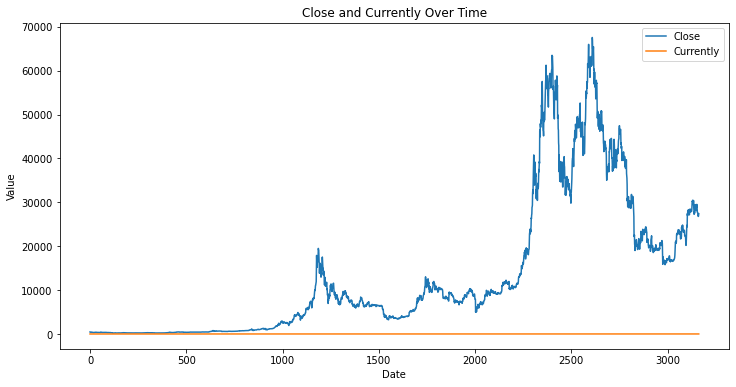

In [13]:
merged_df['Close'].plot(figsize=(12, 6), label='Close')
merged_df['Currently'].plot(figsize=(12, 6), label='Currently')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Close and Currently Over Time')
plt.legend()
plt.show()


In [14]:
import pandas as pd
from scipy.stats import pearsonr
# Pearson korelasyon testi
corr, p_value = pearsonr(merged_df['Close'], merged_df['Currently'])

print("Korelasyon katsayısı:", corr)
print("P değeri:", p_value)


Korelasyon katsayısı: -0.04258717613109304
P değeri: 0.016608295393259045


sonuçlara göre, "Close" ve "Currently" sütunları arasındaki ilişki zayıf ve negatif bir korelasyon sergilemektedir. Korelasyon katsayısı -0.042587 olarak bulunmuştur, bu da değişkenler arasında çok zayıf bir ters yönlü ilişki olduğunu gösterir.

P değeri ise 0.0166 olarak bulunmuştur. P değeri, ilişkinin istatistiksel olarak anlamlı olup olmadığını gösterir. 0.0166 p değeri, kabul edilebilir bir anlamlılık düzeyi olan 0.05'ten küçüktür. Bu nedenle, "Close" ve "Currently" sütunları arasındaki korelasyonun istatistiksel olarak anlamlı olduğu söylenebilir.

Sonuç olarak, verilerinizde zayıf ve negatif bir ilişki olduğu ve bu ilişkinin istatistiksel olarak anlamlı olduğu görülmektedir

In [15]:
#Korelasyon Hipotez Testi (Pearson Korelasyon Katsayısı):
alpha = 0.05  # Anlamlılık düzeyi
if p_value < alpha:
    print("Hipotez reddedildi. İki değişken arasında anlamlı bir ilişki vardır.")
else:
    print("Hipotez kabul edildi. İki değişken arasında anlamlı bir ilişki yoktur.")

Hipotez reddedildi. İki değişken arasında anlamlı bir ilişki vardır.


In [16]:
# İki örnekli t-testi
import pandas as pd
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(merged_df['Close'], merged_df['Currently'])

# Hipotez testi sonuçları
alpha = 0.05  # Anlamlılık düzeyi
if p_value < alpha:
    print("Hipotez reddedildi. İki değişken arasında anlamlı bir fark vardır.")
else:
    print("Hipotez kabul edildi. İki değişken arasında anlamlı bir fark yoktur.")

Hipotez reddedildi. İki değişken arasında anlamlı bir fark vardır.
